# **ETL y EDA**

Importar las librerias que necesitaremos durante el proceso

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np

from ydata_profiling import ProfileReport
from wordcloud import WordCloud

import seaborn as sns
sns.set()

Leer el archivo JSON

In [2]:
rows =[]
with open ('Dataset\\steam_games.json') as f: #Here test.json contains your data
    for line in f.readlines():
        rows.append(ast.literal_eval(line))
        
data = pd.DataFrame(rows) 

In [3]:
pd.set_option('display.max_rows', None)

Obtener una visión general rápida y concisa de la estructura y contenido del DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   discount_price  225 non-null    float64
 8   reviews_url     32133 non-null  object 
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  bool   
 12  id              32133 non-null  object 
 13  developer       28836 non-null  object 
 14  sentiment       24953 non-null  object 
 15  metascore       2677 non-null   object 
dtypes: bool(1), float64(1), object(14)
memory usage: 3.7+ MB


Decido modificar el tipo de dato de todas las columnas con el objetivo de prevenir posibles inconvenientes en futuros análisis.

In [5]:
#columnas_str = ['publisher','app_name','title','url','reviews_url','developer','sentiment']
#data[columnas_str] = data[columnas_str].astype(str)

columnas_float = ['discount_price','id','metascore']
data[columnas_float] = data[columnas_float].replace('NA', np.nan)
data[columnas_float] = data[columnas_float].astype(float)

data['price'] = pd.to_numeric(data['price'], errors='coerce')

 Limpiar el conjunto de datos de duplicados y garantizar que solo haya filas únicas con un índice numérico secuencial para facilitar su manipulación y análisis posterior.

In [6]:
duplicados = data[data.duplicated(subset='id', keep=False)]

duplicados

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
74,NaN,NaN,NaN,NaN,http://store.steampowered.com/,NaN,NaN,14.99,NaN,NaN,19.99,False,NaN,NaN,NaN,NaN
13894,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",NaN,http://steamcommunity.com/app/612880/reviews/?...,"[Single-player, Steam Achievements, Full contr...",59.99,False,612880.0,Machine Games,Mostly Positive,86.0
14573,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/Wolfe...,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",NaN,http://steamcommunity.com/app/612880/reviews/?...,"[Single-player, Steam Achievements, Full contr...",59.99,False,612880.0,Machine Games,Mostly Positive,86.0
30961,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",NaN,NaN,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,NaN,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91.0


In [7]:
data_copia = data.copy()

data.drop_duplicates(subset='id', keep='first', inplace=True)

Obtener la cantidad de valores nulos

In [8]:
data.isna().sum().sort_values(ascending = False)

discount_price    31908
metascore         29528
publisher          8052
sentiment          7182
developer          3299
price              3287
genres             3283
release_date       2067
title              2050
specs               670
tags                163
app_name              2
reviews_url           1
id                    1
url                   0
early_access          0
dtype: int64

Filtrar las filas de la columna 'release_date' que no tienen el formato aaaa-mm-dd para identificar la cantidad de valores atípicos.

In [9]:

filas_formato_incorrecto = data[~data['release_date'].str.contains(r'^\d{4}-\d{2}-\d{2}$', na=False)]

cantidad_registros = filas_formato_incorrecto.shape[0]

cantidad_registros


2352

In [10]:
filas_formato_incorrecto = filas_formato_incorrecto.sort_values(by='release_date', ascending=False)

# Mostrar las filas que no cumplen con el formato
filas_formato_incorrecto.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
13428,一次元创作组,"[Casual, Indie, Early Access]",Puzzle Sisters Foer,Puzzle Sisters Foer,http://store.steampowered.com/app/710190/Puzzl...,预热群52756441,"[Early Access, Casual, Indie]",NaN,http://steamcommunity.com/app/710190/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",NaN,True,710190.0,一次元创作组,NaN,NaN
12647,Steel Fox,[RPG],Dreams of Greatness,Dreams of Greatness,http://store.steampowered.com/app/672240/Dream...,Январь 2018,"[RPG, RPGMaker]",NaN,http://steamcommunity.com/app/672240/reviews/?...,"[Single-player, Partial Controller Support]",NaN,False,672240.0,Steel Fox,NaN,NaN
10275,deeparrowstudio,"[Free to Play, RPG, Strategy]",Samurai Forge,Samurai Forge,http://store.steampowered.com/app/617350/Samur...,soon,"[Free to Play, Strategy, RPG]",NaN,http://steamcommunity.com/app/617350/reviews/?...,"[Single-player, Online Multi-Player, Online Co...",NaN,False,617350.0,deeparrowstudio,NaN,NaN
13008,gillenew,"[Action, Indie, RPG, Early Access]",Sword of Fireheart - The Awakening Element,Sword of Fireheart - The Awakening Element,http://store.steampowered.com/app/503490/Sword...,early access,"[Early Access, Action, RPG, Indie, Pixel Graph...",NaN,http://steamcommunity.com/app/503490/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",NaN,True,503490.0,"gillenew,Fraccaro",NaN,NaN
31958,NaN,[Action],Sniper Ghost Warrior 3 - Multiplayer map,Sniper Ghost Warrior 3 - Multiplayer map,http://store.steampowered.com/app/575301/Snipe...,coming soon,"[Action, Violent]",NaN,http://steamcommunity.com/app/575301/reviews/?...,"[Single-player, Downloadable Content, Partial ...",19.99,False,575301.0,CI Games,NaN,NaN


Crear una nueva columna llamada "año_release_date" para extraer el año de la columna "release_date" utilizando expresiones regulares

In [11]:
data['release_date'] = data['release_date'].astype(str)

data['year_release'] = data['release_date'].str.extract(r'(\d{4})')

data.sample(n=10)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore,year_release
20326,Ubisoft,"[Action, Adventure]",Watch_Dogs® 2 - Pixel Art Pack,Watch_Dogs® 2 - Pixel Art Pack,http://store.steampowered.com/app/525015/Watch...,2016-11-28,"[Action, Adventure]",NaN,http://steamcommunity.com/app/525015/reviews/?...,"[Single-player, Co-op, Downloadable Content, P...",6.99,False,525015.0,Ubisoft,5 user reviews,NaN,2016
811,SEGA,[Action],"Warhammer 40,000: Space Marine - Golden Relic ...","Warhammer 40,000: Space Marine - Golden Relic ...",http://store.steampowered.com/app/55343/Warham...,2011-12-15,[Action],NaN,http://steamcommunity.com/app/55343/reviews/?b...,"[Single-player, Multi-player, Downloadable Con...",0.99,False,55343.0,Relic,Mostly Positive,NaN,2011
8720,NaN,NaN,SYMMETRY alpha,NaN,http://store.steampowered.com/app/585340/SYMME...,nan,"[Free to Play, Design & Illustration, VR]",NaN,http://steamcommunity.com/app/585340/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",NaN,False,585340.0,NaN,Positive,NaN,NaN
27698,YFC games,"[Action, Casual, Free to Play, Indie, Strategy]",Spartans Vs Zombies Defense,Spartans Vs Zombies Defense,http://store.steampowered.com/app/340460/Spart...,2015-01-06,"[Free to Play, Indie, Casual, 2D, Strategy, Si...",NaN,http://steamcommunity.com/app/340460/reviews/?...,"[Single-player, Steam Achievements]",NaN,False,340460.0,YFC games,Mixed,NaN,2015
13890,"Neowiz, NEOBRICKS","[Action, Free to Play]",Blacksquad - Welcome Fortune Box,Blacksquad - Welcome Fortune Box,http://store.steampowered.com/app/654180/Black...,2017-11-21,"[Violent, Gore, Action, Free to Play]",NaN,http://steamcommunity.com/app/654180/reviews/?...,"[Multi-player, Downloadable Content, In-App Pu...",NaN,False,654180.0,NS STUDIO,Very Positive,NaN,2017
19133,NaN,NaN,Inuyasha,Inuyasha,http://store.steampowered.com/app/564550/Inuya...,2002-08-31,"[Action, Anime, Episodic]",NaN,http://steamcommunity.com/app/564550/reviews/?...,[Captions available],1.99,False,564550.0,NaN,2 user reviews,NaN,2002
16991,"Psyonix, Inc.","[Action, Indie, Racing, Sports]",Rocket League X Monstercat Vol. 1,Rocket League X Monstercat Vol. 1,http://store.steampowered.com/app/457193/Rocke...,2017-07-05,"[Sports, Indie, Action, Racing]",NaN,http://steamcommunity.com/app/457193/reviews/?...,"[Single-player, Multi-player, Co-op, Shared/Sp...",5.99,False,457193.0,"Psyonix, Inc.",Positive,NaN,2017
2215,SCS Software,"[Indie, Simulation]",Euro Truck Simulator 2 - Metallic Paint Jobs Pack,Euro Truck Simulator 2 - Metallic Paint Jobs Pack,http://store.steampowered.com/app/297790/Euro_...,2014-05-19,"[Simulation, Indie]",NaN,http://steamcommunity.com/app/297790/reviews/?...,"[Single-player, Downloadable Content, Steam Ac...",1.99,False,297790.0,SCS Software,Positive,NaN,2014
7505,NaN,NaN,Mech Ace Combat - Trainer Edition,NaN,http://store.steampowered.com/app/509380/Mech_...,nan,"[Action, Indie, Casual, VR]",NaN,http://steamcommunity.com/app/509380/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",NaN,False,509380.0,NaN,NaN,NaN,NaN
13152,NaN,"[Indie, RPG, Strategy]",Fantasy Grounds - Pathfinder RPG - Strange Aeo...,Fantasy Grounds - Pathfinder RPG - Strange Aeo...,http://store.steampowered.com/app/770730/Fanta...,2017-12-19,"[Strategy, RPG, Indie]",NaN,http://steamcommunity.com/app/770730/reviews/?...,"[Multi-player, Co-op, Cross-Platform Multiplay...",24.99,False,770730.0,"SmiteWorks USA, LLC",NaN,NaN,2017


Debido a que las funciones para los endpoints que se consumirán en la API requieren un parámetro de entrada para el año, he tomado la decisión de eliminar los valores nulos de la columna "año_release_date". Esto asegura que solo se consideren registros con años válidos al llamar a la API, evitando errores y resultados inesperados al procesar los datos. Al eliminar los valores nulos, garantizo que la información relacionada con la fecha de lanzamiento estará completa y lista para ser utilizada en las solicitudes a la API.

In [12]:
data = data.dropna(subset=['year_release'])

data['year_release'] = data['year_release'].astype(int)

Con el fin de asegurarme de que no haya más valores atípicos en la columna "año_release_date", he ordenado el DataFrame por dicha columna y filtrado los primeros 5 resultados y los últimos 5 valores. Al revisar estos registros, puedo identificar posibles outliers o valores que parezcan incorrectos. En caso de encontrar registros incoherentes o atípicos, puedo aplicar el tratamiento necesario para corregirlos o eliminarlos adecuadamente del conjunto de datos. De esta manera, me aseguro de que la información en la columna "año_release_date" esté coherente y libre de valores inesperados que puedan afectar el análisis posterior.

In [13]:
primeros_10_ascendente = data.sort_values(by='year_release').head(5)

print("Primeros 10 registros en orden ascendente:")
primeros_10_ascendente

Primeros 10 registros en orden ascendente:


,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore,year_release
14847,NaN,NaN,Last Train To Berlin,Last Train To Berlin,http://store.steampowered.com/app/734030/Last_...,1970-07-15,[Movie],NaN,http://steamcommunity.com/app/734030/reviews/?...,[Captions available],3.99,False,734030.0,NaN,1 user reviews,NaN,1970
19102,NaN,NaN,Hercules in New York,Hercules in New York,http://store.steampowered.com/app/582750/Hercu...,1970-12-16,"[Movie, Action-Adventure]",NaN,http://steamcommunity.com/app/582750/reviews/?...,[Captions available],3.99,False,582750.0,NaN,1 user reviews,NaN,1970
14845,NaN,NaN,Massacre At Noon,Massacre At Noon,http://store.steampowered.com/app/734220/Massa...,1975-12-31,[Movie],NaN,http://steamcommunity.com/app/734220/reviews/?...,[Captions available],3.99,False,734220.0,NaN,1 user reviews,NaN,1975
19118,NaN,NaN,Gallagher: An Uncensored Evening,Gallagher: An Uncensored Evening,http://store.steampowered.com/app/579610/Galla...,1980-01-01,[Movie],NaN,http://steamcommunity.com/app/579610/reviews/?...,[Captions available],2.99,False,579610.0,NaN,1 user reviews,NaN,1980
13874,NaN,NaN,The Mystery of the Uurnog,The Mystery of the Uurnog,http://store.steampowered.com/app/755200/The_M...,1981-04-22,"[Documentary, Short]",NaN,http://steamcommunity.com/app/755200/reviews/?...,NaN,NaN,False,755200.0,NaN,4 user reviews,NaN,1981


In [14]:
ultimos_10_descendente = data.sort_values(by='year_release', ascending=False).head(5)

print("Últimos 10 registros en orden descendente:")
ultimos_10_descendente

Últimos 10 registros en orden descendente:


,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore,year_release
13428,一次元创作组,"[Casual, Indie, Early Access]",Puzzle Sisters Foer,Puzzle Sisters Foer,http://store.steampowered.com/app/710190/Puzzl...,预热群52756441,"[Early Access, Casual, Indie]",NaN,http://steamcommunity.com/app/710190/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",NaN,True,710190.0,一次元创作组,NaN,NaN,5275
13140,Freebird Games,"[Adventure, Indie, RPG]",Finding Paradise Soundtrack,Finding Paradise Soundtrack,http://store.steampowered.com/app/770780/Findi...,2021-12-31,"[Adventure, RPG, Indie]",NaN,http://steamcommunity.com/app/770780/reviews/?...,"[Single-player, Downloadable Content]",4.99,False,770780.0,Freebird Games,Positive,NaN,2021
14432,Ninetales Studios,"[Action, Adventure, Indie, RPG, Strategy, Earl...",The Legendary Player - Make Your Reputation - ...,The Legendary Player - Make Your Reputation - ...,http://store.steampowered.com/app/699570/The_L...,2019-12-10,"[Early Access, Action, Adventure, RPG, Indie, ...",NaN,http://steamcommunity.com/app/699570/reviews/?...,"[Single-player, Steam Achievements]",14.99,True,699570.0,Ninetales Studios,3 user reviews,NaN,2019
21368,Poetic Justice Studios,[RPG],The End of an Age: Fading Remnants,The End of an Age: Fading Remnants,http://store.steampowered.com/app/398950/The_E...,2019-09-16,"[RPG, RPGMaker]",NaN,http://steamcommunity.com/app/398950/reviews/?...,"[Single-player, Full controller support]",NaN,False,398950.0,Poetic Justice Studios,NaN,NaN,2019
14328,Svarun Entertainment,"[Adventure, Free to Play, Indie]",K'NOSSOS,K'NOSSOS,http://store.steampowered.com/app/696770/KNOSSOS/,January 2019,"[Adventure, Free to Play, Indie]",NaN,http://steamcommunity.com/app/696770/reviews/?...,[Single-player],NaN,False,696770.0,Svarun Entertainment,NaN,NaN,2019


La eliminación de registros incoherentes es un paso importante para mantener la integridad de los datos y asegurar que futuros análisis o cálculos basados en esta columna se realicen de manera precisa y confiable.

In [15]:
indice_a_eliminar = data[data['year_release'] == 5275].index

data = data.drop(indice_a_eliminar)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29964 entries, 0 to 32133
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       23966 non-null  object 
 1   genres          28730 non-null  object 
 2   app_name        29963 non-null  object 
 3   title           29963 non-null  object 
 4   url             29964 non-null  object 
 5   release_date    29964 non-null  object 
 6   tags            29803 non-null  object 
 7   discount_price  204 non-null    float64
 8   reviews_url     29964 non-null  object 
 9   specs           29295 non-null  object 
 10  price           27237 non-null  float64
 11  early_access    29964 non-null  bool   
 12  id              29964 non-null  float64
 13  developer       28714 non-null  object 
 14  sentiment       23154 non-null  object 
 15  metascore       2551 non-null   float64
 16  year_release    29964 non-null  int32  
dtypes: bool(1), float64(4), int32(1), ob

Contar los registros donde todas las columnas que se utilizarán para crear las funciones para los endpoints contengan valores nulos. De ser así, no tiene sentido mantener esos registros en el DataFrame.

In [17]:
registros_nulos_todas_columnas = data[data[['genres', 'app_name', 'specs', 'early_access', 'sentiment', 'metascore']].isnull().all(axis=1)].shape[0]

print("Registros con nulos en todas las columnas seleccionadas:", registros_nulos_todas_columnas)

Registros con nulos en todas las columnas seleccionadas: 0


## **ANÁLISIS DEL INFORME**

In [18]:
#ProfileReport(data)

#### **Columna: price**

Al tener un 3.8% de valores nulos respecto al total de la data, considero eliminar estos registros, ya que no representan una cantidad significativa. Se evaluó la opción de imputar los datos reemplazando los nulos con el valor 0, pero esto podría afectar el rendimiento del modelo. Por lo tanto, he optado por la opción que mejor se ajuste al propósito del proyecto, que es eliminar los registros con valores nulos para mantener la calidad de los datos y evitar posibles sesgos en el modelo de Machine Learning.

In [19]:
data.dropna(subset=['price'], inplace=True)

#### **Columna: metascore**

Observando la gran cantidad de datos nulos en esta columna, consideré eliminarla, ya que no aportaría mayor información al modelo de ML. Sin embargo, en las funciones que me piden desarrollar para los endpoints, esta variable se debe utilizar. Por lo tanto, he decidido mantenerla y no imputar los valores nulos con valor 0, ya que esto podría introducir un sesgo o distorsión en los datos, afectando el análisis. Además, eliminar las filas con valores nulos tendría un alto impacto en el tamaño y la representatividad de la muestra de datos, por lo que esta opción no es viable en este caso.

#### **Columna: genres**

Descripción de los géneros en una nube de palabras.

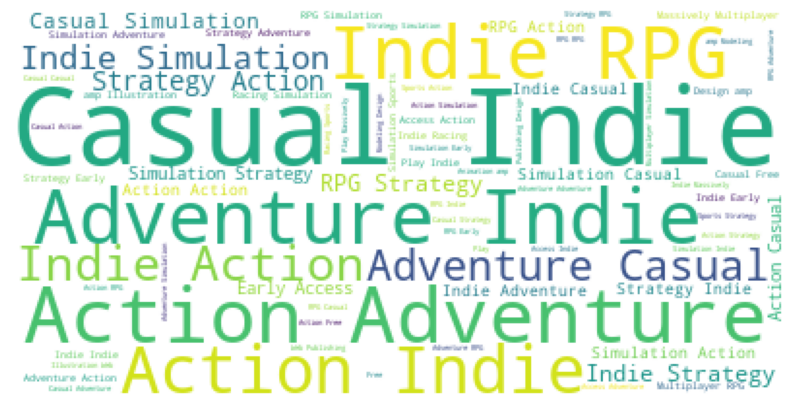

In [20]:
wordcloud2 = WordCloud(background_color='white',  max_font_size=80).generate(' '.join(data['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')))

plt.figure(figsize=(10, 6))

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

#### **Columna: sentiment**

Debido a que encuentro datos como '1 user reviews', '2 user reviews', '3 user reviews', etc., los cuales no aportarán ninguna información a las funciones que vamos a desarrollar, he tomado la decisión de reemplazarlos por nulos. De esta manera, podremos ver realmente las valoraciones de cada juego.

In [21]:
# Buscar los valores en la columna 'sentiment' que incluyan la palabra "reviews"
mask = data['sentiment'].str.contains('reviews', case=False)

# Filtrar la máscara para eliminar valores NA
mask = mask.fillna(False)

# Reemplazar los valores que cumplen la condición por NaN
data.loc[mask, 'sentiment'] = np.nan

#### **Otras columnas:** 

Tras el análisis realizado, identifiqué columnas innecesarias para las funciones requeridas y que no serán útiles en el modelo. Por ende, las eliminé para obtener un dataset limpio. Además, algunas columnas presentaban una ausencia de datos de hasta el **99.3%**, lo que consideré como una contribución insignificante al modelo, por lo que también las eliminé.

In [22]:

data.drop(columns='publisher', inplace=True)
data.drop(columns='title', inplace=True)
data.drop(columns='url', inplace=True)
data.drop(columns='release_date', inplace=True)
data.drop(columns='discount_price', inplace=True)
data.drop(columns='reviews_url', inplace=True)
data.drop(columns='developer', inplace=True)
data.drop(columns='tags', inplace=True)

In [23]:
data= data.reset_index(drop=True)

data.head()

,genres,app_name,specs,price,early_access,id,sentiment,metascore,year_release
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,[Single-player],4.99,False,761140.0,NaN,NaN,2018
1,"[Action, Adventure, Casual]",弹炸人2222,[Single-player],0.99,False,767400.0,NaN,NaN,2017
2,"[Action, Adventure, Simulation]",Battle Royale Trainer,"[Single-player, Steam Achievements]",3.99,False,772540.0,Mixed,NaN,2018
3,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,"[Single-player, Multi-player, Online Multi-Pla...",9.99,False,774276.0,NaN,NaN,2018
4,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Pro Pass,"[Single-player, Multi-player, Online Multi-Pla...",18.99,False,774277.0,NaN,NaN,2018


#### **Filas con NaN:** 

Para el resto de las variables, no voy a imputar los datos nulos, ya que son variables que debo utilizar en las diferentes funciones que se deben desarrollar para la API. Si eliminara los nulos de una columna, como por ejemplo "sentiment", podría terminar eliminando información valiosa en la columna "genres". Por lo tanto, es mejor mantener los valores nulos en estas columnas para evitar la pérdida de información relevante para el análisis y las funciones de la API.

---

Una vez que ya he realizado el proceso de Extracción, Transformación y Carga (ETL) y el Análisis Exploratorio de Datos (EDA) del conjunto de datos, procedo a exportarlo en formato CSV para poder trabajarlo en el modelo de Aprendizaje Automático (ML).

In [25]:
data.to_csv('Dataset\\Data_Clean_steam_games.csv')